# Simples exemplo de como fazer uma regressão linear com o PyTorch

In [1]:
%pylab inline

import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
from torch import optim

from sklearn.datasets import make_regression

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(20, 8)

## preparando os dados

In [3]:
rng = np.random.RandomState(0)
data_x_np, data_y_np = make_regression(n_samples=120, n_features=1, random_state=1, noise=4.0,
                       bias=100.0)

# o pytorch usa apenas variáveis compostas por tensores

data_x = Variable(torch.FloatTensor(data_x_np.tolist()))
data_y = Variable(torch.FloatTensor(data_y_np.tolist())).view(-1, 1) # view == np.reshape

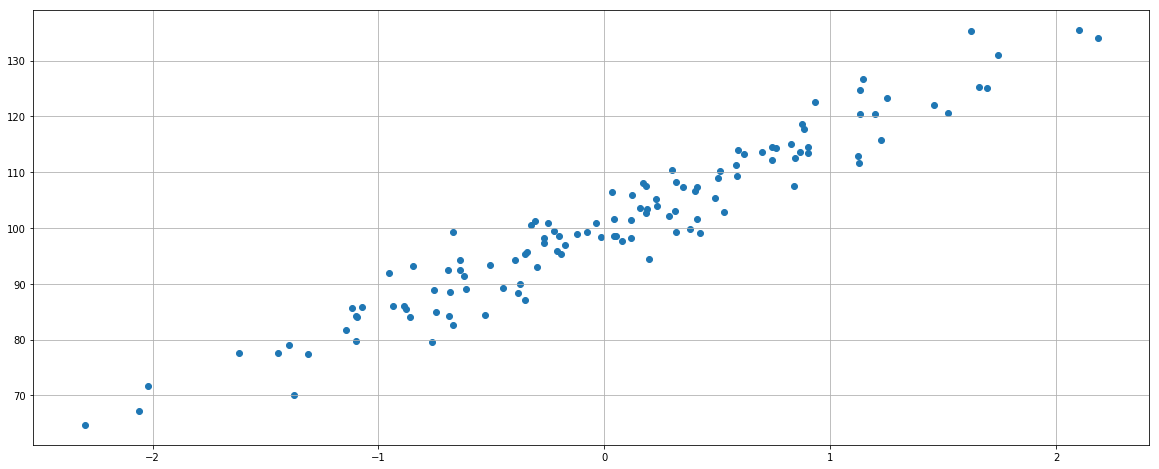

In [4]:
plt.scatter(data_x_np, data_y_np)
plt.grid(True)

## Criando uma mínima rede neural

Esta rede tem só 1 camada, com 1 entrada e 1 saída

In [5]:
class RegLinear(nn.Module):
    def __init__(self):
        super(RegLinear, self).__init__()
        
        self.layer1 = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.layer1(x)

In [6]:
model = RegLinear()

### visualizando a saída antes do treinamento

In [7]:
model(data_x)[:10]

tensor([[ 0.1771],
        [ 0.0513],
        [ 0.1431],
        [-0.0513],
        [-0.4476],
        [ 0.4556],
        [-0.0878],
        [-0.3031],
        [ 0.1831],
        [-0.3105]])

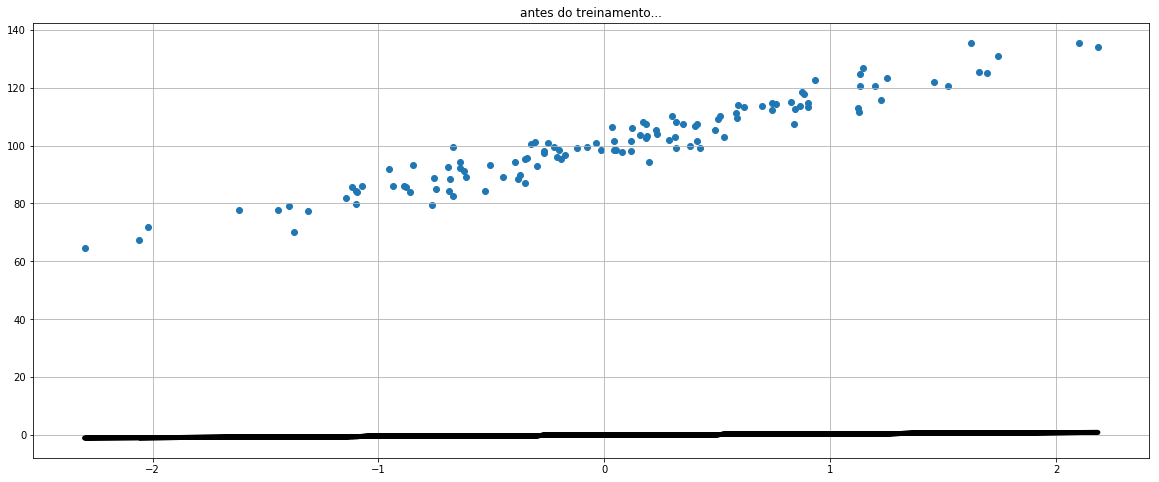

In [8]:
plt.scatter(data_x_np, data_y_np)
plt.plot(data_x_np, model(data_x).detach().numpy(), color='k', linewidth=5)
plt.title("antes do treinamento...")
plt.grid(True)

## treinamento

In [9]:
%time 
n_epochs = 1500
# criterion = torch.nn.KLDivLoss()
criterion = torch.nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.1)


loss_results = []
for epoch in range(n_epochs+1):
    
    optimizer.zero_grad()
    
    out = model(data_x)
    loss = criterion(out, data_y)
    loss.backward()
    optimizer.step()
    
    loss_results.append(loss)
    if epoch % 200 == 0:
        
        print(f'epoch: {epoch} - loss: {loss.item()}')

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 21.2 µs
epoch: 0 - loss: 100.4260025024414
epoch: 200 - loss: 79.70878601074219
epoch: 400 - loss: 58.991661071777344
epoch: 600 - loss: 39.53592300415039
epoch: 800 - loss: 20.095712661743164
epoch: 1000 - loss: 3.3728830814361572
epoch: 1200 - loss: 2.5304996967315674
epoch: 1400 - loss: 2.530499219894409


Text(0.5,1,'loss evolution')

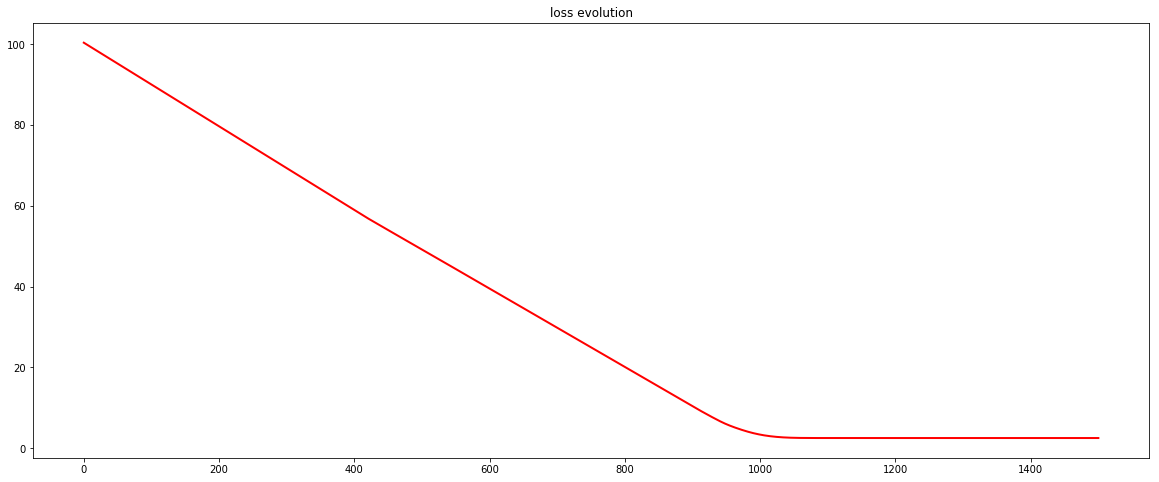

In [10]:
plt.plot(loss_results, linewidth=2, color='r')
plt.title("loss evolution")

## visualizando o resultado

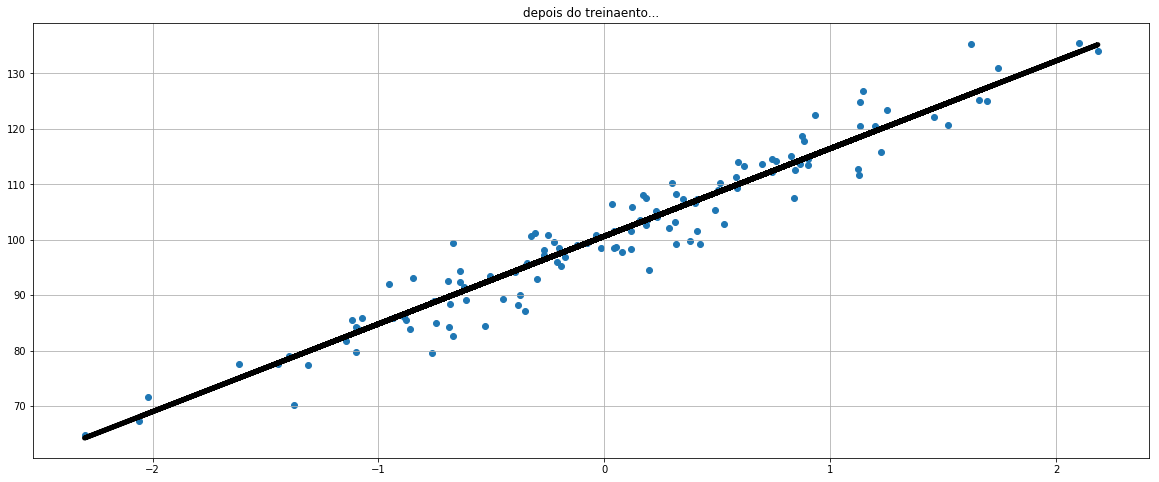

In [11]:
plt.scatter(data_x_np, data_y_np)
plt.plot(data_x_np, model(data_x).detach().numpy(), color='k', linewidth=5)
plt.title("depois do treinaento...")
plt.grid(True)